## Don't know what to listen to? - We do!

#### Getting our bunch of recommendations

The playlist for our recommendations is going to be Summer Hits 2021. #Summervibes

#Lets get back on track!


In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

r = requests.get('https://www.billboard.com/charts/hot-100')
r.status_code

html = r.content
html

soup = BeautifulSoup(html, 'html.parser')
soup

html_table = soup.find_all('span', attrs={'class': 'chart-element__information'})
html_table

for element in soup.find_all('span', attrs={'class': 'chart-element__information__song text--truncate color--primary'}):
                    print(element.get_text())
        
for element in soup.find_all('span', attrs={'class': 'chart-element__information__artist text--truncate color--secondary'}):
                    print(element.get_text()) 
        
song_list= [element.get_text() for element in soup.find_all('span', attrs={'class': 'chart-element__information__song text--truncate color--primary'})]
artist_list= [element.get_text() for element in soup.find_all('span', attrs={'class': 'chart-element__information__artist text--truncate color--secondary'})]
df_songs = pd.DataFrame(song_list)
df_artists = pd.DataFrame(artist_list)
top100 = pd.concat([df_songs, df_artists], axis=1)
top100.columns = top100.columns = ['songs', 'artist']
top100


Butter
Good 4 U
Deja Vu
Levitating
Leave The Door Open
Peaches
Save Your Tears
Kiss Me More
Traitor
Astronaut In The Ocean
Drivers License
Brutal
Montero (Call Me By Your Name)
Enough For You
Happier
Without You
Rapstar
Favorite Crime
1 Step Forward, 3 Steps Back
Forever After All
my.life
Blinding Lights
Beautiful Mistakes
Jealousy, Jealousy
Calling My Phone
pride.is.the.devil
Best Friend
Up
Hope Ur OK
Heartbreak Anniversary
Beat Box
Track Star
Gang Gang
Every Chance I Get
Mood
Wockesha
Heat Waves
Back In Blood
My Ex's Best Friend
Hell Of A View
amari
The Good Ones
What You Know Bout Love
Telepatia
pov
Wants And Needs
Breaking Up Was Easy In The 90's
Seeing Green
On Me
Nobody
Twerkulator
Famous Friends
Time Today
We're Good
Gone
Almost Maybes
Settling Down
Build A Bitch
95.south
Your Power
No More Parties
Lil Bit
Miss The Rage
Ski
Made For You
Sun Goes Down
4 Da Gang
Maybach
Straightenin
Minimum Wage
interlude
applying.pressure
What's Next
One Too Many
Glad You Exist
Blame It On You
Qu

,songs,artist
0,Butter,BTS
1,Good 4 U,Olivia Rodrigo
2,Deja Vu,Olivia Rodrigo
3,Levitating,Dua Lipa Featuring DaBaby
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
...,...,...
95,Country Again,Thomas Rhett
96,punchin'.the.clock,J. Cole
97,Wasted On You,Morgan Wallen
98,the.climb.back,J. Cole


In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="5ab3e2188bb24bd1acbc0f0b74de034e",
                                                           client_secret="32b23efd8ec341e3933ec9ffb29659de"))

playlist = sp.user_playlist_tracks("spotify", "3mn4kXt07PEGZFR46h3HhN")
playlist#.keys()

{'href': 'https://api.spotify.com/v1/playlists/3mn4kXt07PEGZFR46h3HhN/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2021-05-28T07:42:58Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/mejoresplaylistsspotify'},
    'href': 'https://api.spotify.com/v1/users/mejoresplaylistsspotify',
    'id': 'mejoresplaylistsspotify',
    'type': 'user',
    'uri': 'spotify:user:mejoresplaylistsspotify'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7vXDAI8JwjW531ouMGbfcp'},
       'href': 'https://api.spotify.com/v1/artists/7vXDAI8JwjW531ouMGbfcp',
       'id': '7vXDAI8JwjW531ouMGbfcp',
       'name': 'TINI',
       'type': 'artist',
       'uri': 'spotify:artist:7vXDAI8JwjW531ouMGbfcp'},
      {'external_urls': {'spotify': 'https://open.spotify.com/artist/1DxLCyH42yaHKGK3cl5bvG'},
       'href': 'https://api.spot

In [6]:
playlist["total"]

100

In [7]:
len(playlist["items"]) 

100

In [8]:
results = sp.user_playlist_tracks("spotify", "3mn4kXt07PEGZFR46h3HhN")
tracks = results['items']

while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])


In [9]:
results = sp.user_playlist_tracks("spotify", "3mn4kXt07PEGZFR46h3HhN")
tracks = results['items']

for oset in range(100,results['total'],100):
    results = sp.user_playlist_tracks("spotify", "3mn4kXt07PEGZFR46h3HhN", offset=oset)
    tracks += results['items']
len(tracks)

100

In [10]:
# It is limited to 100 tracks, we will have to fix it:

def get_playlist_tracks(username, playlist_id):
    
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

tracks = get_playlist_tracks("spotify", "3mn4kXt07PEGZFR46h3HhN")


In [11]:
# Getting all the artists

def get_artists_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    artists = []
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']
        
        artist_per_song=[]
        
        for artist_info in artists_info:
            artist_per_song.append(artist_info['name'])
            
        artists.append(artist_per_song)
    
    return list(artists)

In [12]:
artists = get_artists_from_playlist("3mn4kXt07PEGZFR46h3HhN")
artists

[['TINI', 'Maria Becerra'],
 ['Rauw Alejandro'],
 ['Natti Natasha', 'Becky G'],
 ['Daviles de Novelda'],
 ['Natti Natasha', 'Cazzu', 'Farina', 'La Duraca'],
 ['C. Tangana', 'Gipsy Kings', 'Nicolás Reyes', 'Tonino Baliardo'],
 ['Doja Cat', 'SZA'],
 ['Rochy RD', 'Myke Towers', 'Nicki Nicole'],
 ['Ozuna'],
 ['Camilo'],
 ['Bad Bunny'],
 ['Lil Nas X'],
 ['Boza'],
 ['Omar Montes', 'Ana Mena', 'Maffio'],
 ['Los Legendarios', 'Wisin', 'Jhay Cortez'],
 ['Chema Rivas', 'Juan Magán'],
 ['Nicky Jam', 'El Alfa'],
 ['BTS'],
 ['Rauw Alejandro', 'Mr. Naisgai'],
 ['Reik', 'Maluma'],
 ['Wisin',
  'Yandel',
  'Farruko',
  'Jon Z',
  'Don Chezina',
  'Chencho Corleone',
  'Myke Towers'],
 ['Riton', 'Nightcrawlers', 'Mufasa & Hypeman', 'Dopamine'],
 ['Funzo & Baby Loud'],
 ['Camilo', 'Evaluna Montaner'],
 ['C. Tangana', 'Antonio Carmona'],
 ['Manuel Turizo', 'Maluma'],
 ['Nio Garcia', 'Flow La Movie'],
 ['Anuel AA', 'Ozuna'],
 ['Blessd', 'Maluma'],
 ['Bad Bunny', 'Luar La L'],
 ['Ptazeta', 'Farina', 'Juack

In [13]:
# Getting all the songs

def get_tracks_name_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    tracks = []
    
    for track in tracks_from_playlist:
        tracks.append(track['track']['name'])

    
    return list(tracks)

In [14]:
tracks = get_tracks_name_from_playlist("3mn4kXt07PEGZFR46h3HhN")
tracks

['Miénteme',
 'Todo De Ti',
 'Ram Pam Pam',
 'Flamenco y Bachata',
 'Las Nenas (feat. La Duraca)',
 'Ingobernable',
 'Kiss Me More (feat. SZA)',
 'Ella No Es Tuya - Remix',
 'Tiempo',
 'Millones',
 'Yonaguni',
 'MONTERO (Call Me By Your Name)',
 'Ella',
 'Solo',
 'Fiel',
 'Anda Suelta',
 'Pikete',
 'Butter',
 '2/Catorce',
 'Perfecta',
 '3G (feat. Jon Z, Don Chezina, Chencho Corleone & Myke Towers) - Remix',
 'Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit',
 'JOVEN PARA SIEMPRE',
 'Machu Picchu',
 "Me Maten - Live at NPR's Tiny Desk",
 'Amor en Coma',
 'Am',
 'Antes',
 'IMPOSIBLE - REMIX',
 '100 MILLONES',
 'Trakatá',
 'Travesuras - Remix',
 'Aloha',
 'Peaches (feat. Daniel Caesar & Giveon)',
 'Canción Bonita',
 "Hecha Pa' Mi",
 'ZITTI E BUONI',
 'Vida de Rico',
 '¿ DÓNDE TE ESPERO ?',
 'Fan de Tus Fotos',
 'Tú Me Dejaste De Querer',
 'Underdog (Nicky Jam & Rauw Alejandro Remix)',
 'Me Fije',
 'WITHOUT YOU (with Miley Cyrus)',
 'Otra Noche Sin Ti',
 'Alguien Más',
 'DELITO',
 'Mala

In [15]:
# Getting all the songs

def get_tracks_ids_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    track_id = []
    tracks_dict={}
    
    for track in tracks_from_playlist:
        track_id.append(track['track']['id'])
        track_id.append(track['track']['id'])
        tracks_dict[track['track']['id']]=track['track']['name']

    
    return list(set(track_id)), tracks_dict


In [16]:
track_id, tracks_dict = get_tracks_ids_from_playlist("3mn4kXt07PEGZFR46h3HhN")
tracks_dict

{'0cOa970mzTWAxKtltpkpLc': 'Miénteme',
 '4fSIb4hdOQ151TILNsSEaF': 'Todo De Ti',
 '4DHDIdeayp8xvlyg22wREO': 'Ram Pam Pam',
 '6ynErSDSlxqsxg0D3LJ8sK': 'Flamenco y Bachata',
 '2KTCXvWUbqfiinbFe7PJKP': 'Las Nenas (feat. La Duraca)',
 '3SK45LddxlEkzI8OWO9Eyo': 'Ingobernable',
 '748mdHapucXQri7IAO8yFK': 'Kiss Me More (feat. SZA)',
 '5YYW3yRktprLRr47WK219Y': 'Ella No Es Tuya - Remix',
 '5H6SZcjJzBNsB2VzKW2Ivd': 'Tiempo',
 '3YAnNBdk0uHyakXXzMbNJq': 'Millones',
 '2JPLbjOn0wPCngEot2STUS': 'Yonaguni',
 '3BZEcbdtXQSo7OrvKRJ6mb': 'MONTERO (Call Me By Your Name)',
 '66S2z95FN3nUAr9S1gUIsp': 'Ella',
 '1wPAOYQJcGSqvXkqcQHExr': 'Solo',
 '7Bk0uXKk1uPT0XuQbpFzvs': 'Fiel',
 '5vQwugZBbpQxqe5H0GN3AY': 'Anda Suelta',
 '50QqjYyqOapIo9CG7aBvKw': 'Pikete',
 '3VqeTFIvhxu3DIe4eZVzGq': 'Butter',
 '71R8HJxQk5qMiRstrlXN9t': '2/Catorce',
 '6VOb0Kkrd45Bp5RHYSla2J': 'Perfecta',
 '6dyUkkcyYuDiHOwIRXYOJm': '3G (feat. Jon Z, Don Chezina, Chencho Corleone & Myke Towers) - Remix',
 '4cG7HUWYHBV6R6tHn1gxrl': 'Friday (feat. M

In [17]:
# Getting all the artists IDs

def get_artists_ids_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    artists_ids = []
    artist_dict ={}
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']
        
        for artist_info in artists_info:
            artists_ids.append(artist_info['id'])
            artist_dict[track['track']['id']]=artist_info['name']
            
    return list(set(artists_ids)), artist_dict

In [18]:
artists_ids, artist_dict = get_artists_ids_from_playlist("3mn4kXt07PEGZFR46h3HhN")
artist_dict

{'0cOa970mzTWAxKtltpkpLc': 'Maria Becerra',
 '4fSIb4hdOQ151TILNsSEaF': 'Rauw Alejandro',
 '4DHDIdeayp8xvlyg22wREO': 'Becky G',
 '6ynErSDSlxqsxg0D3LJ8sK': 'Daviles de Novelda',
 '2KTCXvWUbqfiinbFe7PJKP': 'La Duraca',
 '3SK45LddxlEkzI8OWO9Eyo': 'Tonino Baliardo',
 '748mdHapucXQri7IAO8yFK': 'SZA',
 '5YYW3yRktprLRr47WK219Y': 'Nicki Nicole',
 '5H6SZcjJzBNsB2VzKW2Ivd': 'Ozuna',
 '3YAnNBdk0uHyakXXzMbNJq': 'Camilo',
 '2JPLbjOn0wPCngEot2STUS': 'Bad Bunny',
 '3BZEcbdtXQSo7OrvKRJ6mb': 'Lil Nas X',
 '66S2z95FN3nUAr9S1gUIsp': 'Boza',
 '1wPAOYQJcGSqvXkqcQHExr': 'Maffio',
 '7Bk0uXKk1uPT0XuQbpFzvs': 'Jhay Cortez',
 '5vQwugZBbpQxqe5H0GN3AY': 'Juan Magán',
 '50QqjYyqOapIo9CG7aBvKw': 'El Alfa',
 '3VqeTFIvhxu3DIe4eZVzGq': 'BTS',
 '71R8HJxQk5qMiRstrlXN9t': 'Mr. Naisgai',
 '6VOb0Kkrd45Bp5RHYSla2J': 'Maluma',
 '6dyUkkcyYuDiHOwIRXYOJm': 'Myke Towers',
 '4cG7HUWYHBV6R6tHn1gxrl': 'Dopamine',
 '2hSBhzE4hbWRWl4PLMiJsu': 'Funzo & Baby Loud',
 '1LXb70u8SLsvBAPWHMCTMe': 'Evaluna Montaner',
 '5py3FJrHEuR67BjR7wm8uj':

## Are our songs danceable, loud or have a good tempo?

We have look for our songs features and gather them into a dataframe. But guess who is who

In [19]:
import pandas as pd
df=pd.DataFrame(sp.audio_features(track_id)).sort_values('acousticness')
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
4,0.625,0.939,4,-3.115,0,0.0669,0.00138,0.000000,0.4240,0.6440,102.999,audio_features,776AftMmFFAWUIEAb3lHhw,spotify:track:776AftMmFFAWUIEAb3lHhw,https://api.spotify.com/v1/tracks/776AftMmFFAW...,https://api.spotify.com/v1/audio-analysis/776A...,194787,4
75,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.6950,109.997,audio_features,3VqeTFIvhxu3DIe4eZVzGq,spotify:track:3VqeTFIvhxu3DIe4eZVzGq,https://api.spotify.com/v1/tracks/3VqeTFIvhxu3...,https://api.spotify.com/v1/audio-analysis/3Vqe...,164442,4
65,0.758,0.913,6,-2.926,0,0.1130,0.00364,0.000069,0.1930,0.6580,128.040,audio_features,0b18g3G5spr4ZCkz7Y6Q0Q,spotify:track:0b18g3G5spr4ZCkz7Y6Q0Q,https://api.spotify.com/v1/tracks/0b18g3G5spr4...,https://api.spotify.com/v1/audio-analysis/0b18...,186210,4
70,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.8010,122.980,audio_features,4cG7HUWYHBV6R6tHn1gxrl,spotify:track:4cG7HUWYHBV6R6tHn1gxrl,https://api.spotify.com/v1/tracks/4cG7HUWYHBV6...,https://api.spotify.com/v1/audio-analysis/4cG7...,169153,4
2,0.781,0.670,3,-3.912,0,0.0452,0.01030,0.000000,0.0761,0.5950,127.990,audio_features,5JqZ3oqF00jkT81foAFvqg,spotify:track:5JqZ3oqF00jkT81foAFvqg,https://api.spotify.com/v1/tracks/5JqZ3oqF00jk...,https://api.spotify.com/v1/audio-analysis/5JqZ...,169333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.628,0.683,9,-8.615,0,0.2820,0.55800,0.000000,0.3370,0.3960,107.596,audio_features,7s3ww2P0ShTAFLaVNVd7Rg,spotify:track:7s3ww2P0ShTAFLaVNVd7Rg,https://api.spotify.com/v1/tracks/7s3ww2P0ShTA...,https://api.spotify.com/v1/audio-analysis/7s3w...,251558,4
91,0.705,0.692,9,-6.476,0,0.0357,0.57400,0.000000,0.1300,0.4440,122.991,audio_features,6KEb17S00Inf0v1qYDgUAj,spotify:track:6KEb17S00Inf0v1qYDgUAj,https://api.spotify.com/v1/tracks/6KEb17S00Inf...,https://api.spotify.com/v1/audio-analysis/6KEb...,175890,4
16,0.540,0.455,3,-5.988,1,0.2240,0.67500,0.000011,0.1200,0.4320,83.876,audio_features,71R8HJxQk5qMiRstrlXN9t,spotify:track:71R8HJxQk5qMiRstrlXN9t,https://api.spotify.com/v1/tracks/71R8HJxQk5qM...,https://api.spotify.com/v1/audio-analysis/71R8...,212032,4
61,0.582,0.253,0,-10.095,1,0.0352,0.73600,0.000000,0.1090,0.2710,143.890,audio_features,21AH6D2xxBxjduEbZHh7i5,spotify:track:21AH6D2xxBxjduEbZHh7i5,https://api.spotify.com/v1/tracks/21AH6D2xxBxj...,https://api.spotify.com/v1/audio-analysis/21AH...,229947,4


In [20]:
df['track']=df['id'].map(tracks_dict)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track
4,0.625,0.939,4,-3.115,0,0.0669,0.00138,0.000000,0.4240,0.6440,102.999,audio_features,776AftMmFFAWUIEAb3lHhw,spotify:track:776AftMmFFAWUIEAb3lHhw,https://api.spotify.com/v1/tracks/776AftMmFFAW...,https://api.spotify.com/v1/audio-analysis/776A...,194787,4,ZITTI E BUONI
75,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.6950,109.997,audio_features,3VqeTFIvhxu3DIe4eZVzGq,spotify:track:3VqeTFIvhxu3DIe4eZVzGq,https://api.spotify.com/v1/tracks/3VqeTFIvhxu3...,https://api.spotify.com/v1/audio-analysis/3Vqe...,164442,4,Butter
65,0.758,0.913,6,-2.926,0,0.1130,0.00364,0.000069,0.1930,0.6580,128.040,audio_features,0b18g3G5spr4ZCkz7Y6Q0Q,spotify:track:0b18g3G5spr4ZCkz7Y6Q0Q,https://api.spotify.com/v1/tracks/0b18g3G5spr4...,https://api.spotify.com/v1/audio-analysis/0b18...,186210,4,Rasputin
70,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.8010,122.980,audio_features,4cG7HUWYHBV6R6tHn1gxrl,spotify:track:4cG7HUWYHBV6R6tHn1gxrl,https://api.spotify.com/v1/tracks/4cG7HUWYHBV6...,https://api.spotify.com/v1/audio-analysis/4cG7...,169153,4,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...
2,0.781,0.670,3,-3.912,0,0.0452,0.01030,0.000000,0.0761,0.5950,127.990,audio_features,5JqZ3oqF00jkT81foAFvqg,spotify:track:5JqZ3oqF00jkT81foAFvqg,https://api.spotify.com/v1/tracks/5JqZ3oqF00jk...,https://api.spotify.com/v1/audio-analysis/5JqZ...,169333,4,Prisoner (feat. Dua Lipa)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.628,0.683,9,-8.615,0,0.2820,0.55800,0.000000,0.3370,0.3960,107.596,audio_features,7s3ww2P0ShTAFLaVNVd7Rg,spotify:track:7s3ww2P0ShTAFLaVNVd7Rg,https://api.spotify.com/v1/tracks/7s3ww2P0ShTA...,https://api.spotify.com/v1/audio-analysis/7s3w...,251558,4,Los Tontos - Live at NPR's Tiny Desk
91,0.705,0.692,9,-6.476,0,0.0357,0.57400,0.000000,0.1300,0.4440,122.991,audio_features,6KEb17S00Inf0v1qYDgUAj,spotify:track:6KEb17S00Inf0v1qYDgUAj,https://api.spotify.com/v1/tracks/6KEb17S00Inf...,https://api.spotify.com/v1/audio-analysis/6KEb...,175890,4,Malbec
16,0.540,0.455,3,-5.988,1,0.2240,0.67500,0.000011,0.1200,0.4320,83.876,audio_features,71R8HJxQk5qMiRstrlXN9t,spotify:track:71R8HJxQk5qMiRstrlXN9t,https://api.spotify.com/v1/tracks/71R8HJxQk5qM...,https://api.spotify.com/v1/audio-analysis/71R8...,212032,4,2/Catorce
61,0.582,0.253,0,-10.095,1,0.0352,0.73600,0.000000,0.1090,0.2710,143.890,audio_features,21AH6D2xxBxjduEbZHh7i5,spotify:track:21AH6D2xxBxjduEbZHh7i5,https://api.spotify.com/v1/tracks/21AH6D2xxBxj...,https://api.spotify.com/v1/audio-analysis/21AH...,229947,4,Cómo Me Gustaría Contarte


In [21]:
df['artist']=df['id'].map(artist_dict)
df=df.reset_index(drop=True)
df.head(11)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track,artist
0,0.625,0.939,4,-3.115,0,0.0669,0.00138,0.000000,0.4240,0.644,102.999,audio_features,776AftMmFFAWUIEAb3lHhw,spotify:track:776AftMmFFAWUIEAb3lHhw,https://api.spotify.com/v1/tracks/776AftMmFFAW...,https://api.spotify.com/v1/audio-analysis/776A...,194787,4,ZITTI E BUONI,Måneskin
1,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,audio_features,3VqeTFIvhxu3DIe4eZVzGq,spotify:track:3VqeTFIvhxu3DIe4eZVzGq,https://api.spotify.com/v1/tracks/3VqeTFIvhxu3...,https://api.spotify.com/v1/audio-analysis/3Vqe...,164442,4,Butter,BTS
2,0.758,0.913,6,-2.926,0,0.1130,0.00364,0.000069,0.1930,0.658,128.040,audio_features,0b18g3G5spr4ZCkz7Y6Q0Q,spotify:track:0b18g3G5spr4ZCkz7Y6Q0Q,https://api.spotify.com/v1/tracks/0b18g3G5spr4...,https://api.spotify.com/v1/audio-analysis/0b18...,186210,4,Rasputin,Boney M.
3,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.801,122.980,audio_features,4cG7HUWYHBV6R6tHn1gxrl,spotify:track:4cG7HUWYHBV6R6tHn1gxrl,https://api.spotify.com/v1/tracks/4cG7HUWYHBV6...,https://api.spotify.com/v1/audio-analysis/4cG7...,169153,4,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,Dopamine
4,0.781,0.670,3,-3.912,0,0.0452,0.01030,0.000000,0.0761,0.595,127.990,audio_features,5JqZ3oqF00jkT81foAFvqg,spotify:track:5JqZ3oqF00jkT81foAFvqg,https://api.spotify.com/v1/tracks/5JqZ3oqF00jk...,https://api.spotify.com/v1/audio-analysis/5JqZ...,169333,4,Prisoner (feat. Dua Lipa),Dua Lipa
5,0.763,0.621,11,-6.169,0,0.0660,0.01050,0.000003,0.1060,0.582,82.042,audio_features,68mrW6gXHgupgSiDHgaDi5,spotify:track:68mrW6gXHgupgSiDHgaDi5,https://api.spotify.com/v1/tracks/68mrW6gXHgup...,https://api.spotify.com/v1/audio-analysis/68mr...,211130,4,Polvo,Myke Towers
6,0.965,0.485,2,-8.784,1,0.1910,0.02060,0.023700,0.0655,0.312,124.025,audio_features,1zLBsSVxETQOfINOLYvT5m,spotify:track:1zLBsSVxETQOfINOLYvT5m,https://api.spotify.com/v1/tracks/1zLBsSVxETQO...,https://api.spotify.com/v1/audio-analysis/1zLB...,222523,4,GIRL LIKE ME,Shakira
7,0.759,0.636,6,-5.585,1,0.0369,0.02240,0.000143,0.1660,0.536,109.976,audio_features,5cpJFiNwYyWwFLH0V6B3N8,spotify:track:5cpJFiNwYyWwFLH0V6B3N8,https://api.spotify.com/v1/tracks/5cpJFiNwYyWw...,https://api.spotify.com/v1/audio-analysis/5cpJ...,214507,4,Del Mar,Sia
8,0.856,0.618,7,-4.892,1,0.2860,0.03030,0.000000,0.0866,0.391,81.993,audio_features,2XIc1pqjXV3Cr2BQUGNBck,spotify:track:2XIc1pqjXV3Cr2BQUGNBck,https://api.spotify.com/v1/tracks/2XIc1pqjXV3C...,https://api.spotify.com/v1/audio-analysis/2XIc...,203201,4,LA NOCHE DE ANOCHE,ROSALÍA
9,0.659,0.771,2,-5.583,1,0.1160,0.03680,0.000000,0.0642,0.679,196.033,audio_features,5SuAVjvO7r7n0v6ctuJ4L6,spotify:track:5SuAVjvO7r7n0v6ctuJ4L6,https://api.spotify.com/v1/tracks/5SuAVjvO7r7n...,https://api.spotify.com/v1/audio-analysis/5SuA...,256020,4,Normal que se lo crea (feat. Keen Levy),Keen Levy


## Cool! Lets put birds of a feather flock together

In [22]:
df.drop(columns =['uri', 'track_href', 'analysis_url', 'type'], inplace =True)

In [23]:
df_kmeans=df.drop(columns=['track', 'id', 'artist'])

In [24]:
X=df_kmeans
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.625,0.939,4,-3.115,0,0.0669,0.00138,0.000000,0.4240,0.6440,102.999,194787,4
1,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.6950,109.997,164442,4
2,0.758,0.913,6,-2.926,0,0.1130,0.00364,0.000069,0.1930,0.6580,128.040,186210,4
3,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.8010,122.980,169153,4
4,0.781,0.670,3,-3.912,0,0.0452,0.01030,0.000000,0.0761,0.5950,127.990,169333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.628,0.683,9,-8.615,0,0.2820,0.55800,0.000000,0.3370,0.3960,107.596,251558,4
96,0.705,0.692,9,-6.476,0,0.0357,0.57400,0.000000,0.1300,0.4440,122.991,175890,4
97,0.540,0.455,3,-5.988,1,0.2240,0.67500,0.000011,0.1200,0.4320,83.876,212032,4
98,0.582,0.253,0,-10.095,1,0.0352,0.73600,0.000000,0.1090,0.2710,143.890,229947,4


In [25]:
import pickle
from sklearn.preprocessing import StandardScaler
#X_prep = StandardScaler().fit_transform(X)
scaler=StandardScaler()
scaler.fit(X)
X_prep=scaler.transform(X)

with open('scaler.pkl', 'wb') as file:
    scaler=pickle.dump(scaler, file)


#save to a pickle file

scaled_df=pd.DataFrame(X_prep, columns=X.columns)
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.280862,1.922065,-0.436812,1.076201,-1.224745,-0.628164,-1.348853,-0.127166,2.038974,-0.048053,-0.466993,-0.216731,0.0
1,0.145986,-1.595248,0.720306,-0.036335,0.816497,-0.373140,-1.338780,-0.127166,-0.648373,0.197679,-0.252500,-1.044817,0.0
2,0.135338,1.731544,0.141747,1.177682,-1.224745,-0.206780,-1.336548,-0.123059,0.177015,0.019403,0.300527,-0.450789,0.0
3,0.838114,1.357829,-1.015372,0.910287,0.816497,-0.087951,-1.314986,-0.119333,1.063662,0.708416,0.145436,-0.916258,0.0
4,0.380244,-0.049096,-0.726092,0.648261,-1.224745,-0.826516,-1.300285,-0.127166,-0.765249,-0.284148,0.298995,-0.911346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.248918,0.046165,1.009586,-1.876958,-1.224745,1.337990,1.681817,-0.127166,1.337717,-1.242983,-0.326092,1.332495,0.0
96,-0.429013,0.112114,1.009586,-0.728448,-1.224745,-0.913352,1.768933,-0.127166,-0.330792,-1.011706,0.145773,-0.732412,0.0
97,-2.185953,-1.624559,-0.726092,-0.466422,0.816497,0.807832,2.318856,-0.126525,-0.411396,-1.069526,-1.053123,0.253868,0.0
98,-1.738732,-3.104761,-1.593931,-2.671626,0.816497,-0.917922,2.650987,-0.127166,-0.500061,-1.845267,0.786338,0.742751,0.0


In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_prep)
#save to a pickle file

with open('kmeans.pkl', 'wb') as file: 
    pickle.dump(kmeans, file) 

In [27]:
clusters = kmeans.predict(X_prep)
clusters
#save to a pickle file

with open('clusters.pkl', 'wb') as file: 
    pickle.dump(clusters, file) 

In [28]:
pd.Series(clusters).value_counts().sort_index()

0     6
1    20
2    25
3    14
4    15
5    15
6     1
7     4
dtype: int64

In [29]:
X_df = pd.DataFrame(X_prep)
X_df["cluster"] = clusters
X_df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,cluster
0,-1.280862,1.922065,-0.436812,1.076201,-1.224745,-0.628164,-1.348853,-0.127166,2.038974,-0.048053,-0.466993,-0.216731,0.0,5
1,0.145986,-1.595248,0.720306,-0.036335,0.816497,-0.373140,-1.338780,-0.127166,-0.648373,0.197679,-0.252500,-1.044817,0.0,2
2,0.135338,1.731544,0.141747,1.177682,-1.224745,-0.206780,-1.336548,-0.123059,0.177015,0.019403,0.300527,-0.450789,0.0,1
3,0.838114,1.357829,-1.015372,0.910287,0.816497,-0.087951,-1.314986,-0.119333,1.063662,0.708416,0.145436,-0.916258,0.0,5
4,0.380244,-0.049096,-0.726092,0.648261,-1.224745,-0.826516,-1.300285,-0.127166,-0.765249,-0.284148,0.298995,-0.911346,0.0,1
5,0.188578,-0.408155,1.588145,-0.563608,-1.224745,-0.636390,-1.299197,-0.126991,-0.524242,-0.346785,-1.109336,0.229254,0.0,1
6,2.339499,-1.404727,-1.015372,-1.967701,0.816497,0.506191,-1.244204,1.279140,-0.850690,-1.647718,0.177465,0.540158,0.0,2
7,0.145986,-0.298239,0.141747,-0.250036,0.816497,-0.902383,-1.234404,-0.118680,-0.040616,-0.568426,-0.253144,0.321409,0.0,2
8,1.178853,-0.430138,0.431027,0.122062,0.816497,1.374553,-1.191390,-0.127166,-0.680615,-1.267075,-1.110838,0.012879,0.0,2
9,-0.918826,0.691005,-1.015372,-0.248962,0.816497,-0.179358,-1.155999,-0.127166,-0.861168,0.120587,2.384550,1.454258,0.0,4


In [30]:
import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

inertia

[1035.7435186591147,
 932.2015567919275,
 853.2810877418908,
 782.8530662678045,
 726.1724467299024,
 684.802761042671,
 647.3067800461206,
 590.1577108270242,
 575.6069471454485,
 550.2883762308835,
 534.667155634357,
 511.42433064324837,
 482.31428001729006,
 471.2290344424507,
 458.8577476891162,
 445.0717542264785,
 422.1210139854016,
 405.5969819931391]

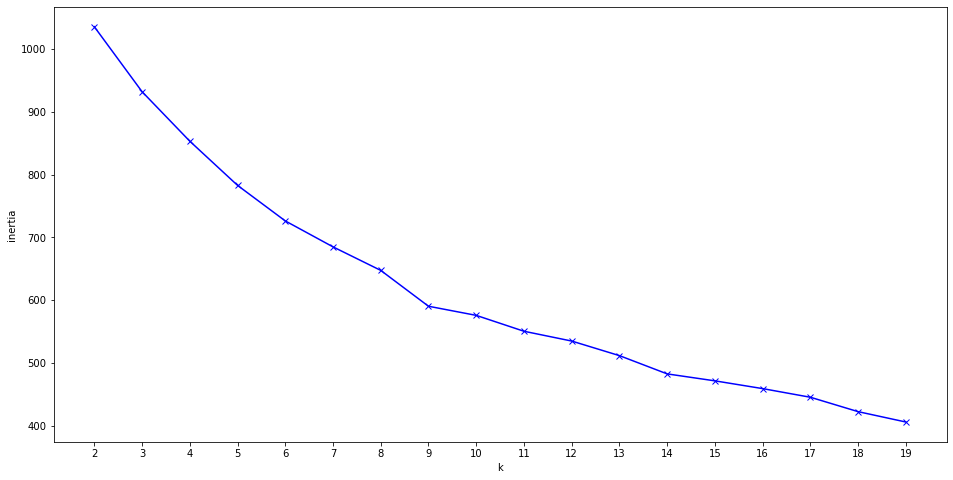

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

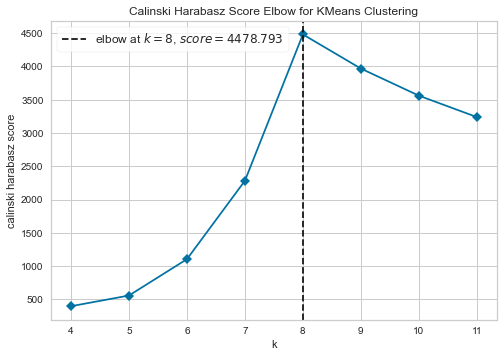

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [32]:
#!pip install yellowbrick 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
X_prep, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X_prep)        # Fit the data to the visualizer
visualizer.show()   

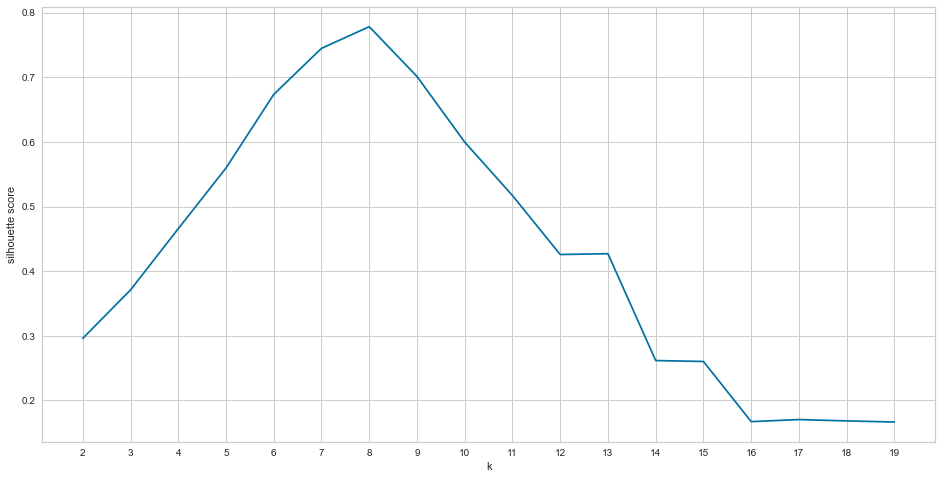

In [33]:
from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

## DJ! Dale al play!!

In [60]:
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler

def getSongRecommendation():

    #get song id and song features
    song_name=input('Insert a song: ')
    song_info= sp.search(f'song:{song_name}')
    #print(song_info)
    items=song_info['tracks']['items'][0]
    #print(items)
    song_id=items['id']
    #print(song_id)
    pd.DataFrame(sp.audio_features(song_id))

    #put song features in a df and drop useless columns
    features=pd.DataFrame(sp.audio_features(song_id))

    features.drop(columns =['uri', 'track_href', 'analysis_url', 'type', 'id'], inplace =True)

    #load pickle file with scaling and scale song features (THE CHOSEN ONE)
    with open('scaler.pkl', 'rb') as file: 
        scaler = pickle.load(file)
        
    scaled_features=scaler.transform(features)

    #print(scaled_features)
    
    #apply kmeans
    with open('kmeans.pkl', 'rb') as file: 
        kmeans = pickle.load(file)
    
    song_cluster = kmeans.predict(scaled_features)#.to_int64
    #print(song_cluster)
    
    #filter the dataset to the songs that belong to the cluster

    filtered=X_df[X_df['cluster']==song_cluster[0]]#this should be a var that stores the cluster that of the song
    
    filtered_df=filtered.drop('cluster', axis=1)
    
    #print(filtered_df)
    #we need a logic to check if the song is in the df

    if song_name in top100['songs'].values:
        display(top100.sample())
        return
    else:
        for song in filtered_df:
            if song in filtered_df:
                song_index=df[df['track']==song_name].index
                filtered_df_=df.drop(song_index)
            else:
                filtered_df_=df
        #print(filtered_df_)
        closest, _ = pairwise_distances_argmin_min(scaled_features, filtered_df)
        song_loc=closest.astype(int)
        #print(song_loc)
        song=df.loc[song_loc]
        display(song[['track', 'artist']])


In [61]:
recommendation = getSongRecommendation()

Insert a song: Butter


,songs,artist
41,The Good Ones,Gabby Barrett


word


In [66]:
top100['songs']#.values

0                       Butter
1                     Good 4 U
2                      Deja Vu
3                   Levitating
4          Leave The Door Open
                ...           
95               Country Again
96          punchin'.the.clock
97               Wasted On You
98              the.climb.back
99    Things A Man Oughta Know
Name: songs, Length: 100, dtype: object